In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
try:
    import empyrical as emp
except:
    emp = None
import tushare as ts
import time
import random

from common.log import *
from common.config import Config
from spider.spider_nasdaq import Spider_nasdaq
from spider.spider_coinmarketcap import Spider_coinmarketcap

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from pandas_highcharts.core import serialize
from pandas_highcharts.display import display_charts

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

CONF = Config('../conf/secret.yaml').data[0]
ts_token = CONF['TUSHARE']['TOKEN']
ts.set_token(ts_token)
pro = ts.pro_api()

CONF = Config().data[0]
MONGODB = CONF['MONGODB']
NASDAQ = CONF['NASDAQ']
CRYPTOCURRENCY = CONF['CRYPTOCURRENCY']
CRYPTOCURRENCY = list(CRYPTOCURRENCY.keys())
NASDAQ100 = CONF['NASDAQ100']

MONITOR_TARGET = {
    '399300': {'MA': [17], 'ROLLINGMAX': [], 'ROLLINGMIN': [], 'N': 10, 'NAME': '沪深300(SZ:399300)'},
    '000905': {'MA': [17], 'ROLLINGMAX': [], 'ROLLINGMIN': [], 'N': 10, 'NAME': '中证500(SH:000905)'},
    '399006': {'MA': [17], 'ROLLINGMAX': [], 'ROLLINGMIN': [], 'N': 10, 'NAME': '创业板指(SZ:399006)'},
    'BTC': {'MA': [30], 'ROLLINGMAX': [], 'ROLLINGMIN': [], 'N': 2, 'NAME': 'BITCOIN'},
    'EOS': {'MA': [30], 'ROLLINGMAX': [], 'ROLLINGMIN': [], 'N': 2, 'NAME': 'EOS'},
    'ETH': {'MA': [30], 'ROLLINGMAX': [], 'ROLLINGMIN': [], 'N': 2, 'NAME': 'ETHEREUM'},
    'XRP': {'MA': [30], 'ROLLINGMAX': [], 'ROLLINGMIN': [], 'N': 2, 'NAME': 'RIPPLE'},
    'LTC': {'MA': [30], 'ROLLINGMAX': [], 'ROLLINGMIN': [], 'N': 2, 'NAME': 'LITECOIN'},
}

pd

<module 'pandas' from 'd:\\python36\\lib\\site-packages\\pandas\\__init__.py'>

In [2]:
%%time

IS_DOWNLOAD_DATA = True

spider_n = Spider_nasdaq()
spider_c = Spider_coinmarketcap()

for symbol in MONITOR_TARGET:
    if not IS_DOWNLOAD_DATA:
        break
        
    print(symbol)

    # 指数
    if symbol in ['399300', '000905', '000016', '399006']:
        df = ts.get_k_data(code=symbol, index=True, start='2005-01-01', end=time.strftime('%Y-%m-%d'))
        datafile = '../database/market/%s.csv' % symbol
        df.to_csv(datafile, index=False, encoding='utf-8')
        
    # CRYPTOCURRENCY
    elif symbol in ['BTC', 'EOS', 'ETH', 'XRP', 'LTC']:
        pass
        
    # ETF
    else:
        df = ts.get_k_data(code=symbol, ktype='D', autype='qfq', index=False, start='2005-01-01', end=time.strftime('%Y-%m-%d'))
        datafile = '../database/market/%s.csv' % symbol
        df.to_csv(datafile, index=False, encoding='utf-8')
        time.sleep(1)

    time.sleep(1)

399300
000905
399006
BTC
EOS
ETH
XRP
LTC
Wall time: 10.5 s


In [3]:
%run OKAPI.ipynb

BTC
start=2019-07-01T00%3A00%3A00.000Z&end=2020-01-01T00%3A00%3A00.000Z
start=2019-01-01T00%3A00%3A00.000Z&end=2019-07-01T00%3A00%3A00.000Z
start=2018-07-01T00%3A00%3A00.000Z&end=2019-01-01T00%3A00%3A00.000Z
start=2018-01-01T00%3A00%3A00.000Z&end=2018-07-01T00%3A00%3A00.000Z
start=2017-07-01T00%3A00%3A00.000Z&end=2018-01-01T00%3A00%3A00.000Z
start=2017-01-01T00%3A00%3A00.000Z&end=2017-07-01T00%3A00%3A00.000Z
EOS
start=2019-07-01T00%3A00%3A00.000Z&end=2020-01-01T00%3A00%3A00.000Z
start=2019-01-01T00%3A00%3A00.000Z&end=2019-07-01T00%3A00%3A00.000Z
start=2018-07-01T00%3A00%3A00.000Z&end=2019-01-01T00%3A00%3A00.000Z
start=2018-01-01T00%3A00%3A00.000Z&end=2018-07-01T00%3A00%3A00.000Z
start=2017-07-01T00%3A00%3A00.000Z&end=2018-01-01T00%3A00%3A00.000Z
start=2017-01-01T00%3A00%3A00.000Z&end=2017-07-01T00%3A00%3A00.000Z
ETH
start=2019-07-01T00%3A00%3A00.000Z&end=2020-01-01T00%3A00%3A00.000Z
start=2019-01-01T00%3A00%3A00.000Z&end=2019-07-01T00%3A00%3A00.000Z
start=2018-07-01T00%3A00%3A00.000Z&e

In [4]:
%%time

stock_df_dict = {}

for symbol in MONITOR_TARGET:
    stock_data_file = '../database/market/%s.csv' % symbol
    if symbol in ['BTC', 'EOS', 'ETH', 'XRP', 'LTC']:
        stock_data_file = '../database/market/%s_OKEX.csv' % symbol
    try:
        stock_df = pd.read_csv(stock_data_file)
    except:
        print(symbol)
        continue

    # 筛选字段
    stock_df = stock_df.loc[:, ['date', 'close']]

    # 抛弃空值异常值
    stock_df.dropna(axis=0, how='any', inplace=True)

    # 格式化日期
    # 445 ms ± 17.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
    stock_df = stock_df.assign(date=pd.to_datetime(stock_df['date']))  # need .index.to_period('D')

    # 用日期作索引，日期升序排序
    # 95.1 µs ± 1.58 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
    if symbol in NASDAQ100 or symbol in ['BTC', 'EOS', 'ETH', 'XRP', 'LTC']:
#         stock_df = stock_df[1:]
        stock_df = stock_df[::-1]
    stock_df.set_index(['date'], inplace=True)
    stock_df.index = stock_df.index.to_period('D')

    # 计算每天涨跌幅
    N = MONITOR_TARGET[symbol]['N']
    stock_df['N_sht'] = stock_df.close.shift(N-1)
    stock_df['N_chg'] = (stock_df.close.shift(0) - stock_df.close.shift(N-1)) / stock_df.close.shift(N-1)

    for MA_PARAM in MONITOR_TARGET[symbol]['MA']:
        stock_df['MA_%d' % MA_PARAM] = stock_df['close'].rolling(MA_PARAM).mean()
    
    for ROLLINGMAX_PARAM in MONITOR_TARGET[symbol]['ROLLINGMAX']:
        stock_df['ROLLINGMAX_%d' % ROLLINGMAX_PARAM] = stock_df['close'].rolling(ROLLINGMAX_PARAM).max()
        
    for ROLLINGMIN_PARAM in MONITOR_TARGET[symbol]['ROLLINGMIN']:
        stock_df['ROLLINGMIN_%d' % ROLLINGMIN_PARAM] = stock_df['close'].rolling(ROLLINGMIN_PARAM).min()
    
    # 减少数据
    stock_df.dropna(how='any', inplace=True)
    
    stock_df_dict[symbol] = stock_df

Wall time: 317 ms


In [5]:
%store MONITOR_TARGET
%store stock_df_dict

Stored 'MONITOR_TARGET' (dict)
Stored 'stock_df_dict' (dict)


In [6]:
for symbol in MONITOR_TARGET:
    symbol
    stock_df_dict[symbol].tail(2)

'399300'

,close,N_sht,N_chg,MA_17
date,,,,
2019-06-03,3632.01,3666.78,-0.009482,3656.018235
2019-06-04,3598.47,3649.38,-0.013950,3648.254706


'000905'

,close,N_sht,N_chg,MA_17
date,,,,
2019-06-03,4853.82,5009.87,-0.031149,4962.079412
2019-06-04,4795.41,4976.39,-0.036368,4946.261176


'399006'

,close,N_sht,N_chg,MA_17
date,,,,
2019-06-03,1468.98,1493.72,-0.016563,1491.304118
2019-06-04,1456.27,1488.63,-0.021738,1486.739412


'BTC'

,close,N_sht,N_chg,MA_30
date,,,,
2019-06-04,7942.0,8472.4,-0.062603,7681.076667
2019-06-05,7649.6,7942.0,-0.036817,7745.003333


'EOS'

,close,N_sht,N_chg,MA_30
date,,,,
2019-06-04,6.734,7.270,-0.073728,6.350367
2019-06-05,6.253,6.734,-0.071429,6.398200


'ETH'

,close,N_sht,N_chg,MA_30
date,,,,
2019-06-04,248.84,259.66,-0.041670,234.040
2019-06-05,239.22,248.84,-0.038659,236.329


'XRP'

,close,N_sht,N_chg,MA_30
date,,,,
2019-06-04,0.4120,0.4408,-0.065336,0.383503
2019-06-05,0.3934,0.4120,-0.045146,0.386527


'LTC'

,close,N_sht,N_chg,MA_30
date,,,,
2019-06-04,104.16,111.08,-0.062297,95.597667
2019-06-05,100.69,104.16,-0.033314,96.435000


,SYMBOL,DATE,CLOSE,MA,MADIFF,N_chg,N_sht
0,399300,2019-06-04,3598.4700,3648.254706,-1.38%,-1.40%,3649.380
1,000905,2019-06-04,4795.4100,4946.261176,-3.15%,-3.64%,4976.390
2,399006,2019-06-04,1456.2700,1486.739412,-2.09%,-2.17%,1488.630
3,BTC,2019-06-05,7649.6000,7745.003333,-1.25%,-3.68%,7942.000
4,EOS,2019-06-05,6.2530,6.398200,-2.32%,-7.14%,6.734
5,ETH,2019-06-05,239.2200,236.329000,1.21%,-3.87%,248.840
6,XRP,2019-06-05,0.3934,0.386527,1.75%,-4.51%,0.412
7,LTC,2019-06-05,100.6900,96.435000,4.23%,-3.33%,104.160


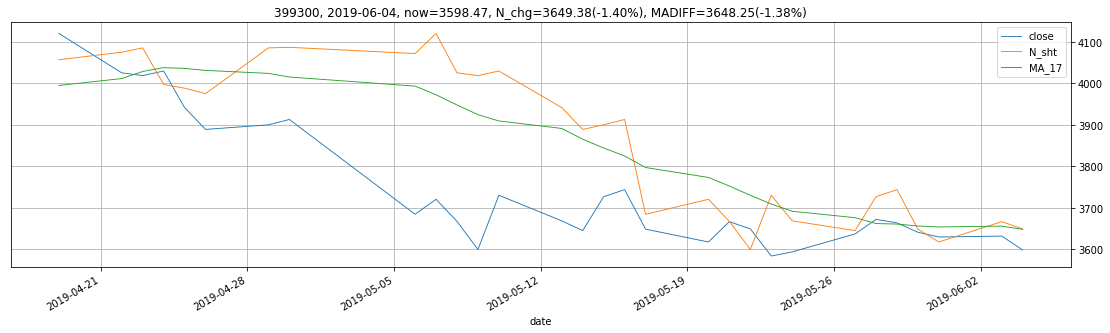

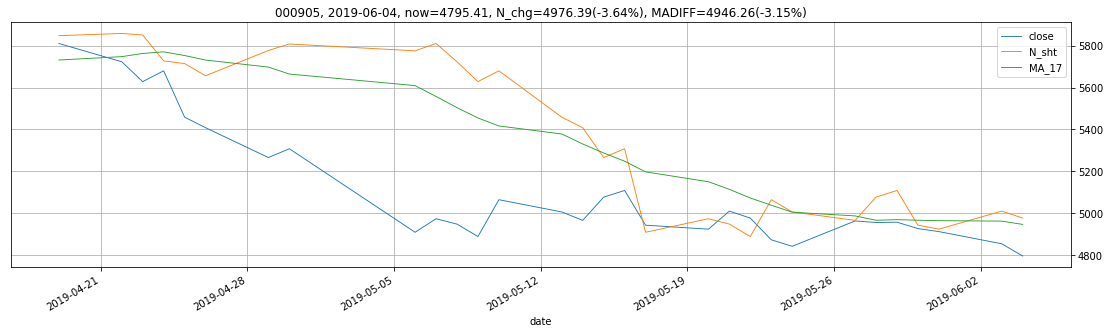

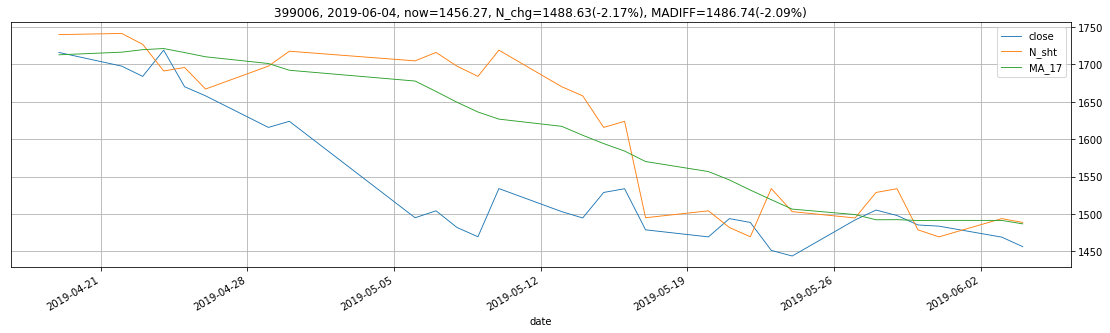

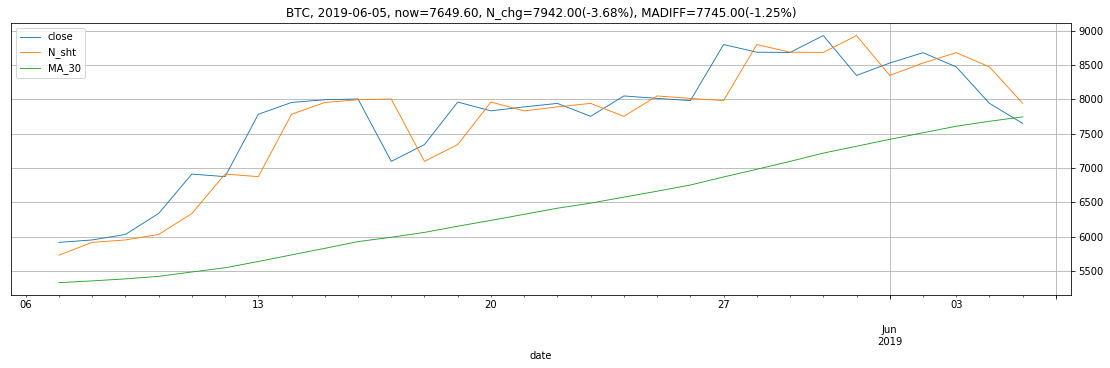

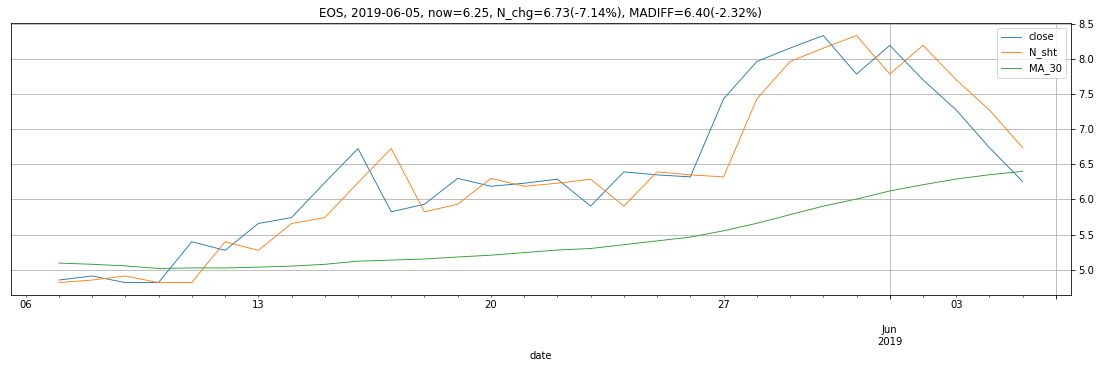

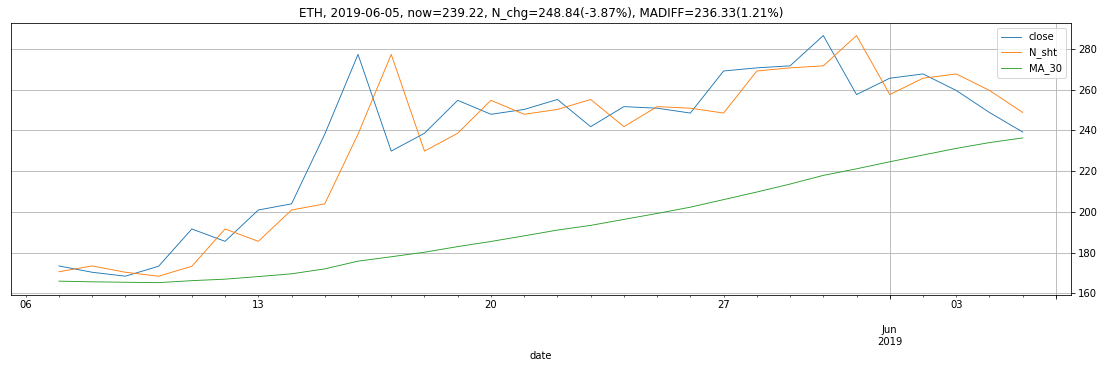

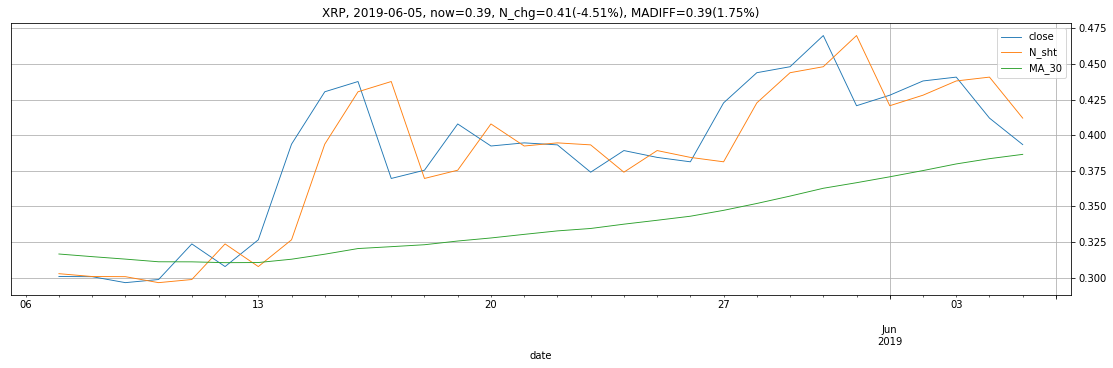

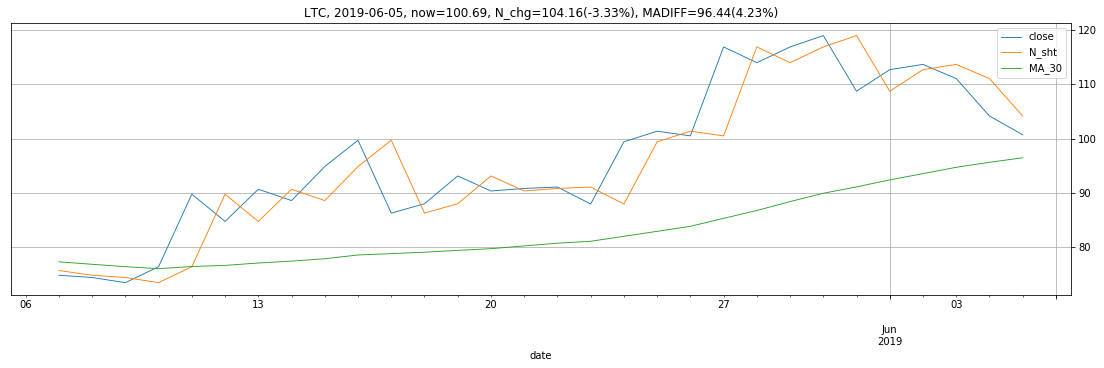

In [14]:
monitor_df = pd.DataFrame(columns=['SYMBOL', 'DATE', 'CLOSE'])
#  'BUY', 'BUYDIFF', 'SELL', 'SELLDIFF'
for symbol in MONITOR_TARGET:
    df = stock_df_dict[symbol].iloc[-30:].copy()
    
    df.reset_index(drop=False, inplace=True)
    # df = df.astype(dtype={'date': 'datetime64[ns]'})
    df['date'] = df['date'].apply(lambda x: x.to_timestamp().to_datetime64())
    df.set_index('date', inplace=True)
    
    today_market = df.iloc[-1]
    now_point = today_market.close
    for col in df.columns:
        if 'ROLLINGMAX' in col:
            buy_point = today_market[col]
            buy_diff = (buy_point - now_point) / now_point * 100
        elif 'ROLLINGMIN' in col:
            sell_point = today_market[col]
            sell_diff = (now_point - sell_point) / now_point * 100
        elif 'MA' in col:
            ma = today_market[col]
            ma_diff = (now_point - ma) / now_point * 100
        elif 'N_chg' in col:
            n_chg = today_market[col] * 100
    
    monitor_df = monitor_df.append({
        'SYMBOL': symbol, 
        'DATE': today_market.name.date(), 
        'CLOSE': now_point, 
#         'BUY': buy_point, 
#         'BUYDIFF': '+%.2f%%' % buy_diff, 
#         'SELL': sell_point, 
#         'SELLDIFF': '-%.2f%%' % sell_diff,
        'MA': ma,
        'MADIFF': '%.2f%%' % ma_diff,
        'N_sht': today_market.N_sht, 
        'N_chg': '%.2f%%' % n_chg,
    }, ignore_index=True)
    
    title = symbol
    title = '%s, %s, now=%.2f, N_chg=%.2f(%.2f%%), MADIFF=%.2f(%.2f%%)' % \
        (symbol, today_market.name.date(), now_point, today_market.N_sht, n_chg, ma, ma_diff)
    
    df.drop(columns=['N_chg'], inplace=True)
    ax = df.plot(kind='line', title=title, linewidth=0.9, grid=True, figsize=(19, 5))
    ax.yaxis.tick_right()
    
#     display_charts(df, chart_type='stock', kind='line', title=title, figsize=(1000, 600))


monitor_df

In [8]:
# df = ts.get_realtime_quotes(['sh', 'sz', 'hs300', 'sz50', 'sh000905', 'zxb', 'cyb'])
# df = ts.get_realtime_quotes(['hs300', 'sh000905', 'cyb'])
# df = ts.get_realtime_quotes(list(MONITOR_TARGET.keys()))
# df
# list(MONITOR_TARGET.keys())